Quality Review: {'Missing Values': np.int64(0), 'Feature Count': 15, 'Sample Size': 2976}
Performance Metrics: {'R2 Score': 0.6596928359406035, 'MAE': 8005059.349469873, 'CV Stability (Mean R2)': np.float64(0.3854607989977608), 'CV Std Dev': np.float64(0.10118569981063169)}


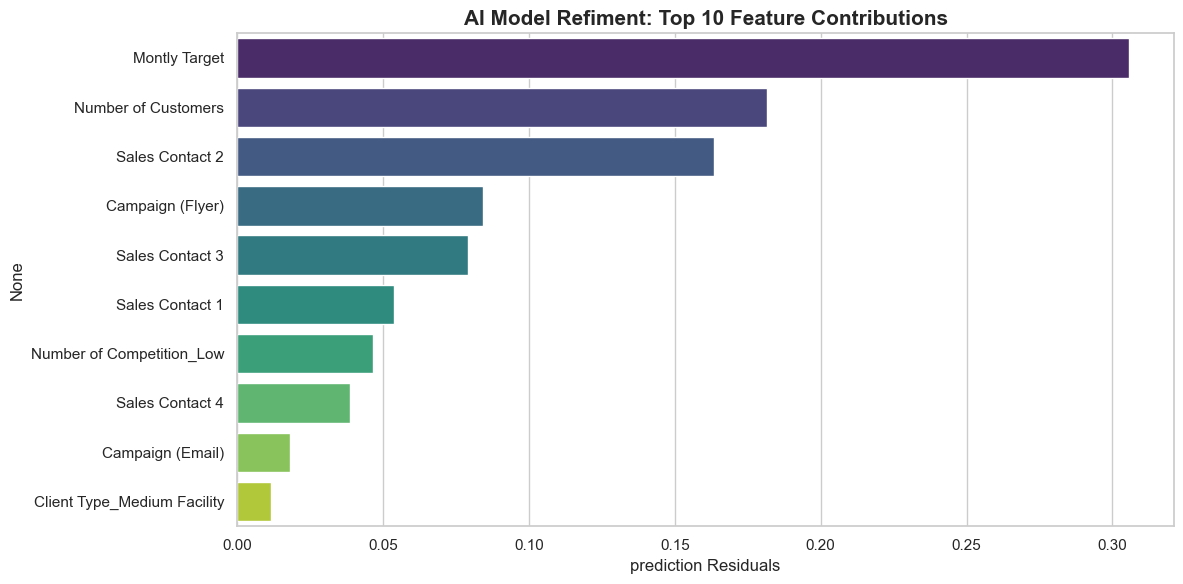

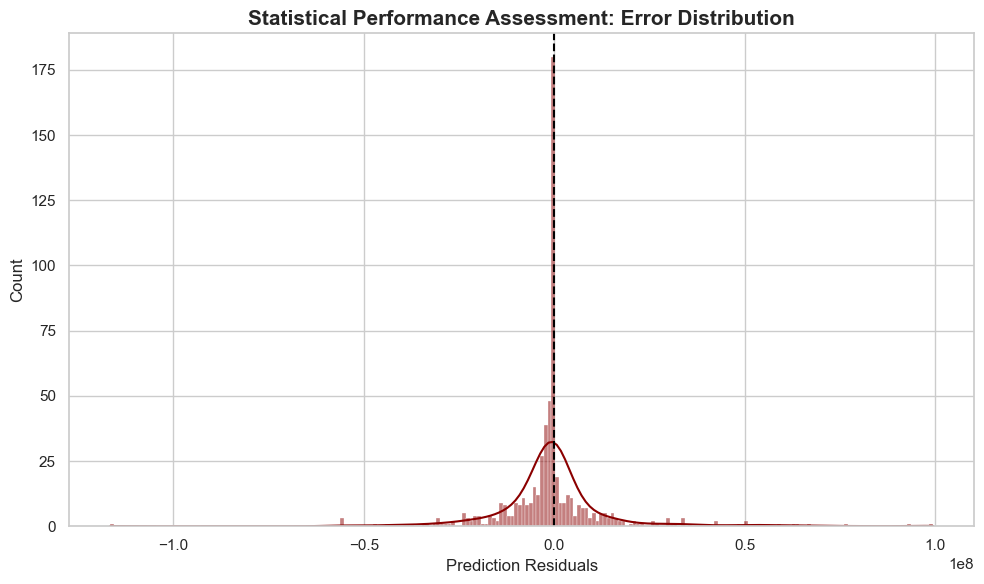

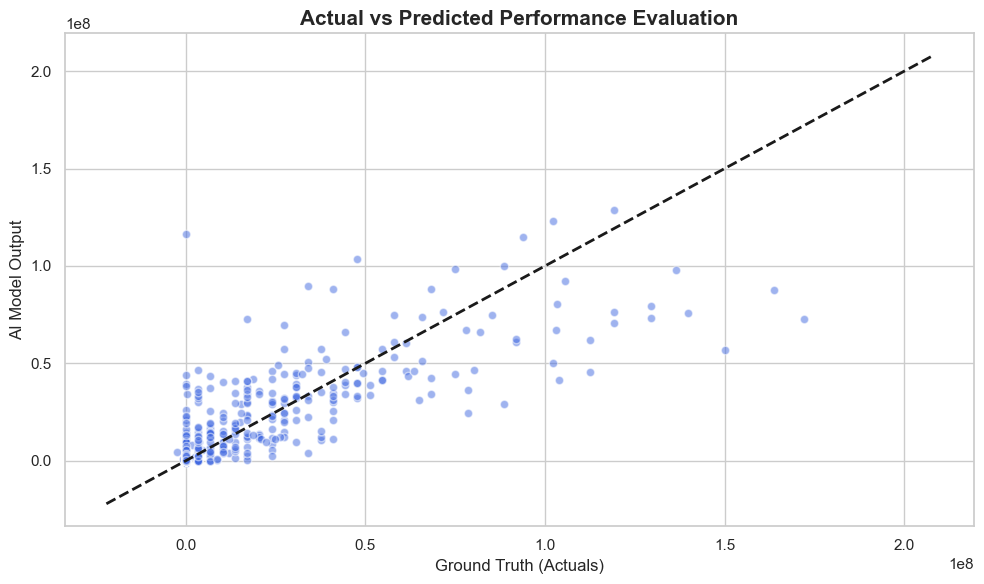

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

class AIModelEvaluator:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)

    def preprocess(self):
        df_clean = self.df.drop(columns=['Client ID', 'Calendardate'])
        df_clean = pd.get_dummies(df_clean, columns=['Client Type', 'Number of Competition'], drop_first=True) 
        df_clean = df_clean.fillna(df_clean.median())
        self.X = df_clean.drop(columns=['Amount Collected', 'Unit Sold'])
        self.y = df_clean['Amount Collected']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

    def assess_quality(self):
        # Automated Data Quality Review
        quality_metrics = {
            "Missing Values": self.df.isnull().sum().sum(),
            "Feature Count": self.X.shape[1],
            "Sample Size": self.X.shape[0]
        }
        return quality_metrics
    def run_benchmark(self):
        #Statistical Modeling
        self.model.fit(self.X_train, self.y_train)
        y_pred = self.model.predict(self.X_test)

        cv_scores = cross_val_score(self.model, self.X, self.y, cv=5, scoring='r2')

        return {
            "R2 Score": r2_score(self.y_test, y_pred),
            "MAE": mean_absolute_error(self.y_test, y_pred),
            "CV Stability (Mean R2)": np.mean(cv_scores),
            "CV Std Dev": np.std(cv_scores)

        }

    def generate_visual_reports(self):
        sns.set_theme(style="whitegrid", palette="muted")

        #Report: Feature Importance Model Refinement Insights
        plt.figure(figsize=(12, 6))
        importances = pd.Series(self.model.feature_importances_, index=self.X.columns).sort_values(ascending=False).head(10)
        sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette='viridis', legend=False)
        plt.title('AI Model Refiment: Top 10 Feature Contributions', fontsize=15, fontweight='bold')
        plt.xlabel('prediction Residuals')
        plt.tight_layout()
        plt.savefig('ai_feature_importance.png')

        y_pred = self.model.predict(self.X_test)
        residuals = self.y_test - y_pred
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True, color='darkred')
        plt.axvline(0, color='black', linestyle='--')
        plt.title('Statistical Performance Assessment: Error Distribution', fontsize=15, fontweight='bold')
        plt.xlabel('Prediction Residuals')
        plt.tight_layout()
        plt.savefig('error_distribution_report.png')

        #report : Learning Curve Visualization Scalability and Data Quality
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, y_pred, alpha=0.5, color='royalblue', edgecolor='w')
        plt.plot([self.y.min(), self.y.max()], [self.y.min(), self.y.max()], 'k--', lw=2)
        plt.title('Actual vs Predicted Performance Evaluation', fontsize=15, fontweight='bold')
        plt.xlabel('Ground Truth (Actuals)')
        plt.ylabel('AI Model Output')
        plt.tight_layout()
        plt.savefig('performance_assessment_summary.png')
        
# Run the Toolkit
evaluator = AIModelEvaluator('Campaign-Data.csv')
evaluator.preprocess()
quality = evaluator.assess_quality()
metrics = evaluator.run_benchmark()
evaluator.generate_visual_reports()

print(f"Quality Review: {quality}")
print(f"Performance Metrics: {metrics}")

                    
                    










        